# Correlação das vendas diárias

# 0. Configuração

In [22]:
# bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

In [14]:
# função do gráfico

def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette("Accent")
    sns.set_style('darkgrid')

    ax = sns.lineplot(x = x, y = y, data = dataset)

    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)

    ax = ax

In [3]:
# função do gráfico de comparação

def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize = (16, 12))

    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)

    plt.subplot(3,1,2)
    sns.lineplot(x = x, y = y2, data = dataset)

    plt.subplot(3,1,3)
    sns.lineplot(x = x, y = y3, data = dataset)

In [23]:
# base de dados - chocolura

chocolura = pd.read_csv('dados/chocolura.csv')
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

In [4]:
# base de dados - vendas por dia da chocolura

vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')

vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.strftime("%A")

dias_traduzidos = {
    'Monday':"Segunda-feira",
    'Tuesday':"Terça-feira",
    'Wednesday':"Quarta-feira",
    'Thursday':"Quinta-feira",
    'Friday':"Sexta-feira",
    'Saturday':"Sábado",
    'Sunday':"Domingo"
}

vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

# 1. Gráficos de autocorrelação

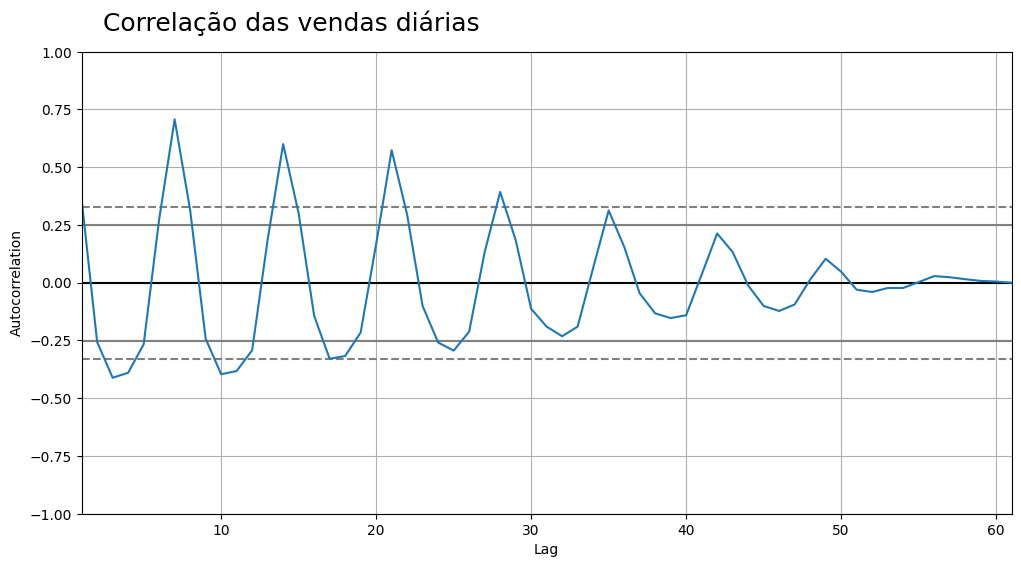

In [7]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle("Correlação das vendas diárias", fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

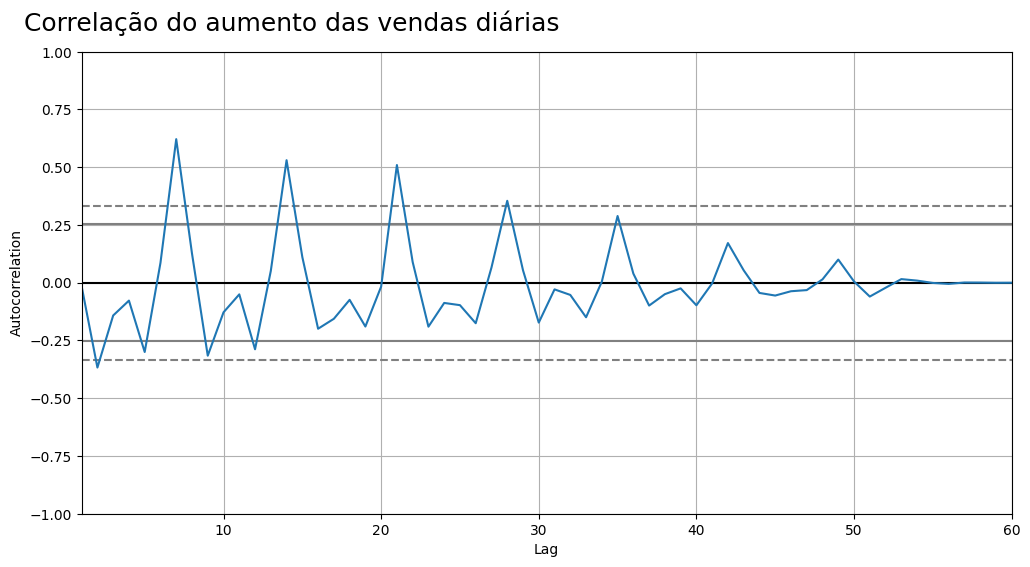

In [8]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle("Correlação do aumento das vendas diárias", fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

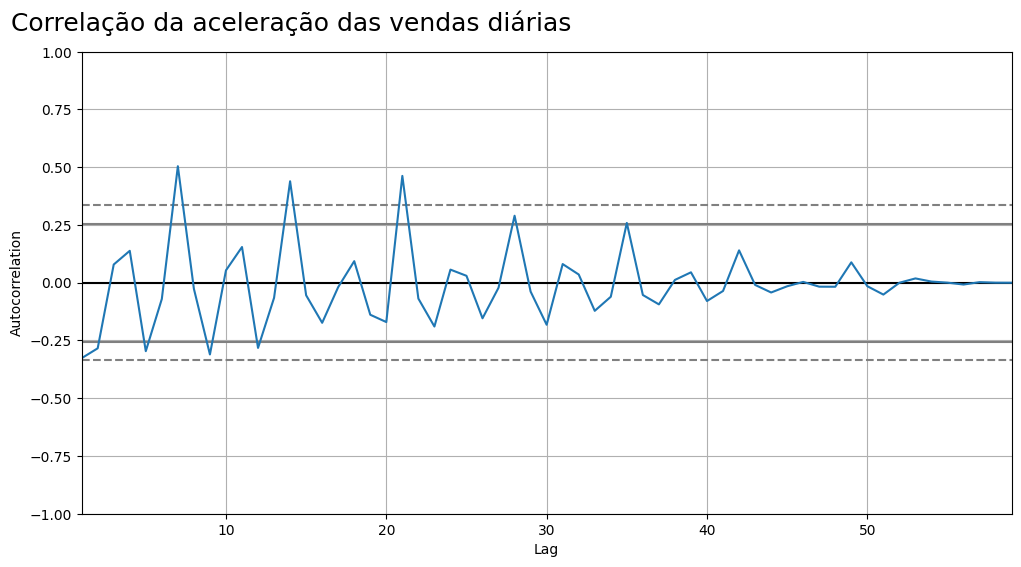

In [9]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle("Correlação da aceleração das vendas diárias", fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# 2. Cafelura - Análise de vendas

In [10]:
cafelura = pd.read_csv('dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [11]:
cafelura.shape

(24, 2)

In [12]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [13]:
cafelura.isna().sum().sum()

0

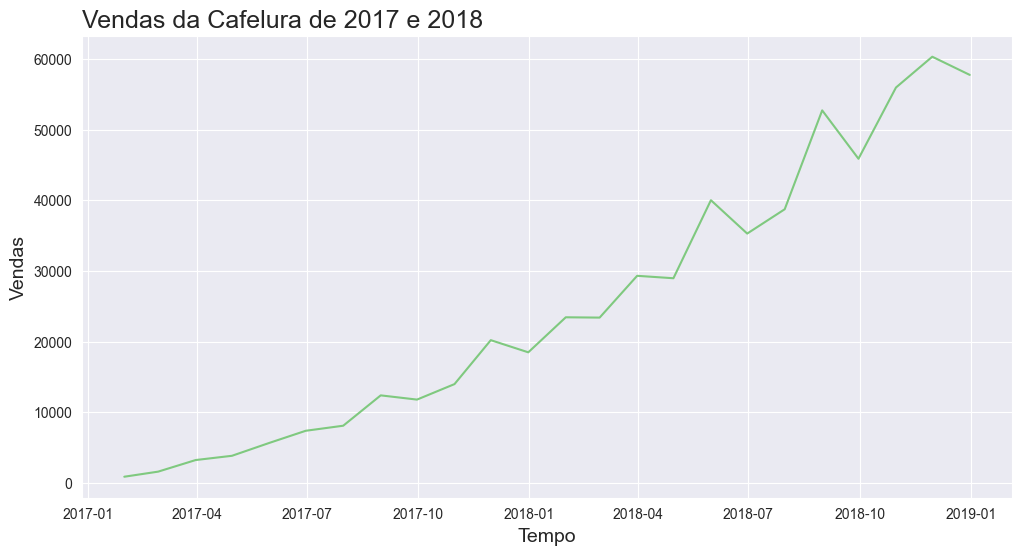

In [15]:
plotar(titulo = "Vendas da Cafelura de 2017 e 2018",
       labelx = "Tempo",
       labely = "Vendas",
       x = 'mes',
       y = 'vendas',
       dataset = cafelura)

## 2.1. Normalização das vendas pela quantidade de dias de final de semana

In [16]:
dias_final_de_semana = pd.read_csv('dados/dias_final_de_semana.csv')
dias_final_de_semana.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [17]:
dias_final_de_semana['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [18]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / dias_final_de_semana['quantidade_de_dias'].values

cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


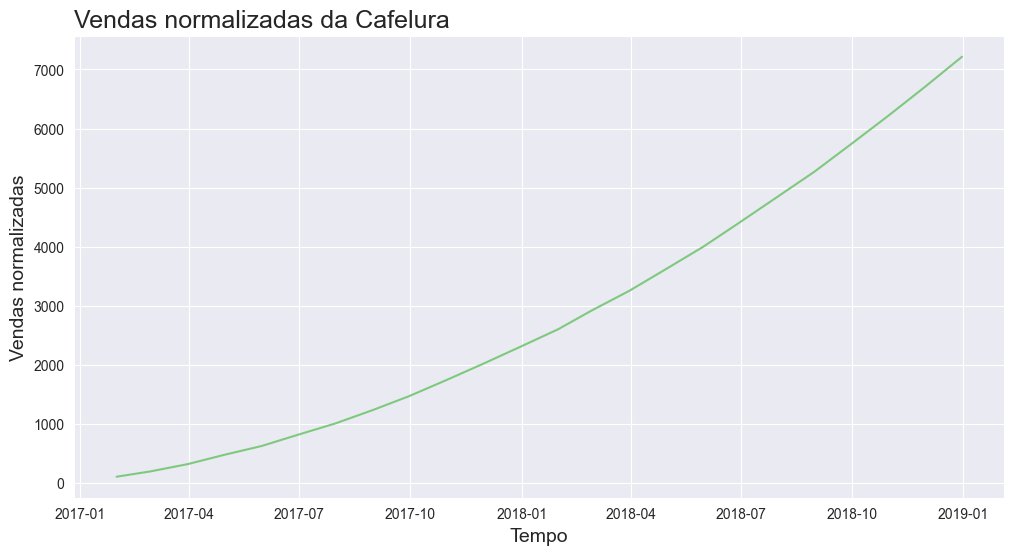

In [19]:
plotar(titulo = 'Vendas normalizadas da Cafelura',
       labelx = 'Tempo',
       labely = 'Vendas normalizadas',
       x = 'mes',
       y = 'vendas_normalizadas',
       dataset = cafelura)

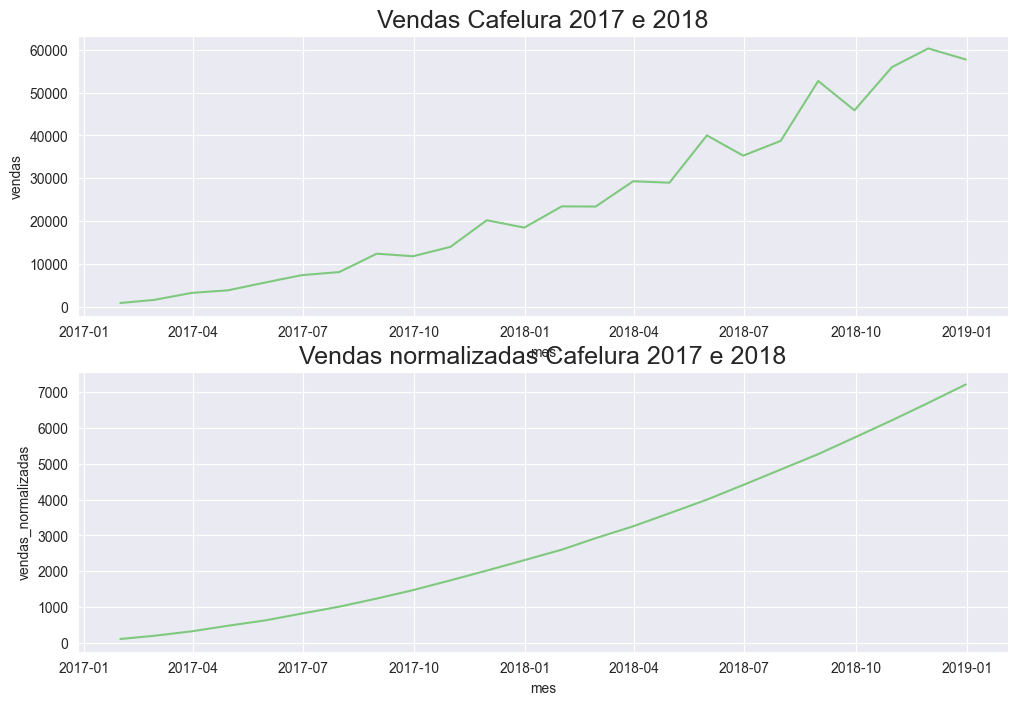

In [21]:
# comparar os 2 gráficos

plt.figure(figsize = (12, 8))

ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas', data = cafelura)

ax = plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas_normalizadas', data = cafelura)

ax = ax

# 2. Statsmodels

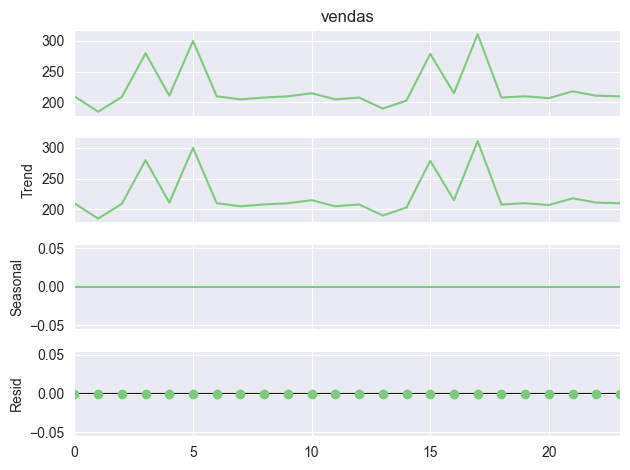

In [30]:
resultado = seasonal_decompose(chocolura['vendas'], period = 1)
ax = resultado.plot()

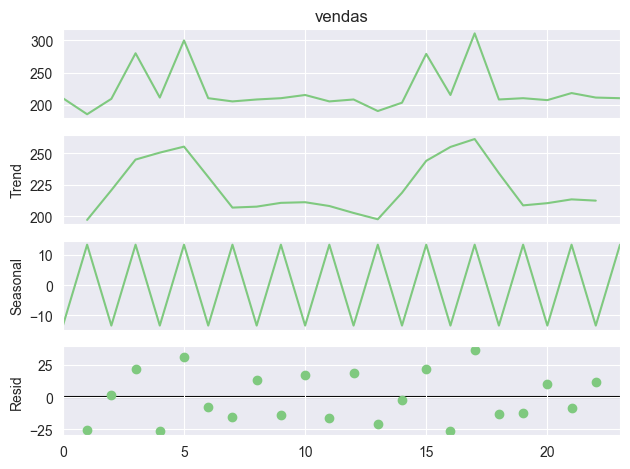

In [31]:
resultado = seasonal_decompose(chocolura['vendas'], period = 2)
ax = resultado.plot()

In [32]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [34]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,-13.386364,NaN
1,185.0,197.25,13.386364,-25.636364
2,209.0,220.75,-13.386364,1.636364
3,280.0,245.00,13.386364,21.613636
4,211.0,250.50,-13.386364,-26.113636


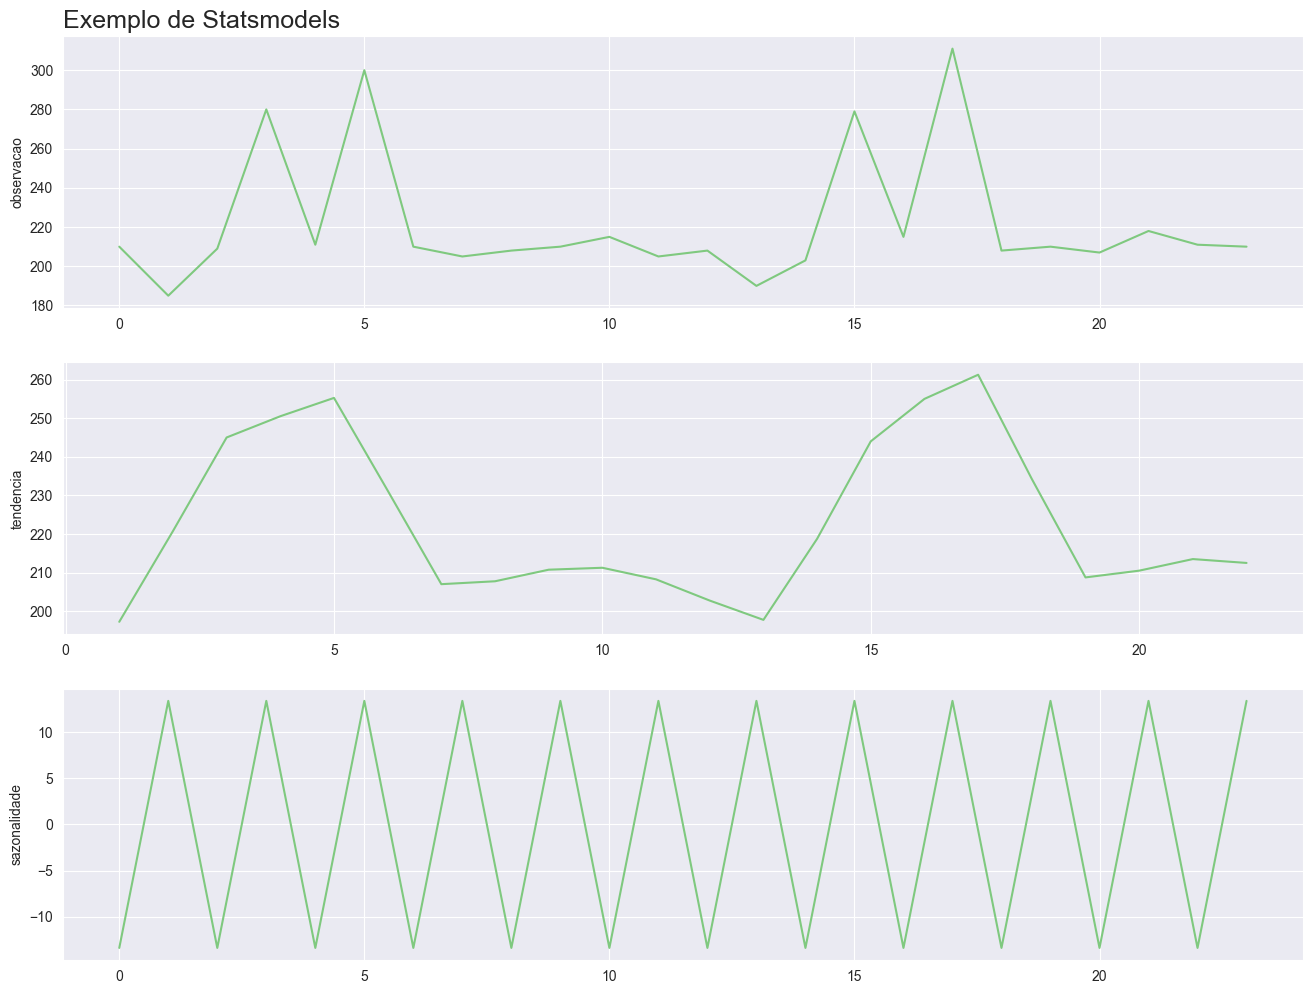

In [35]:
plot_comparacao(x = resultado.index,
                y1 = 'observacao',
                y2 = 'tendencia',
                y3 = 'sazonalidade',
                dataset = resultado,
                titulo = "Exemplo de Statsmodels")